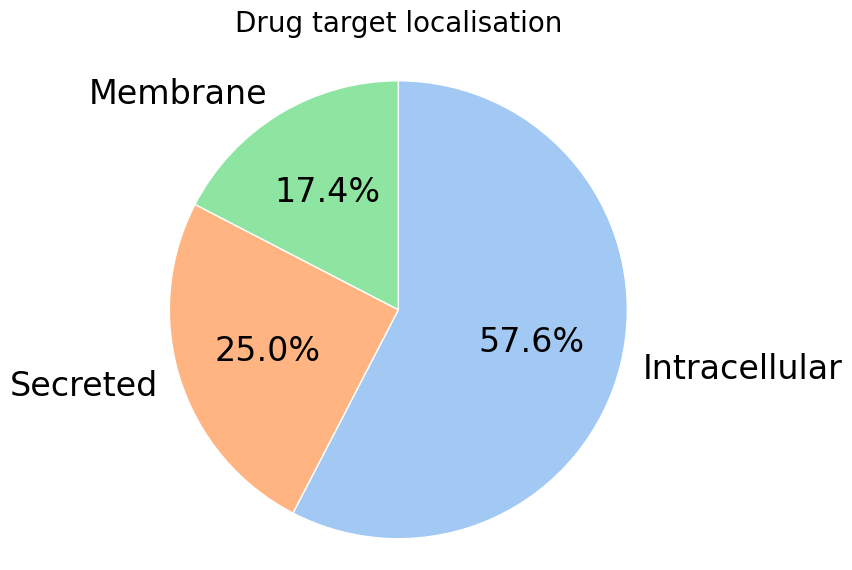

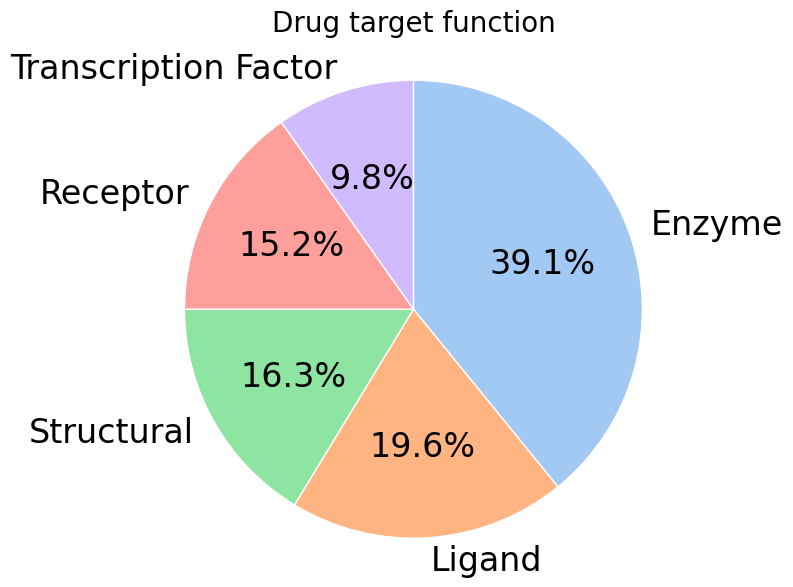

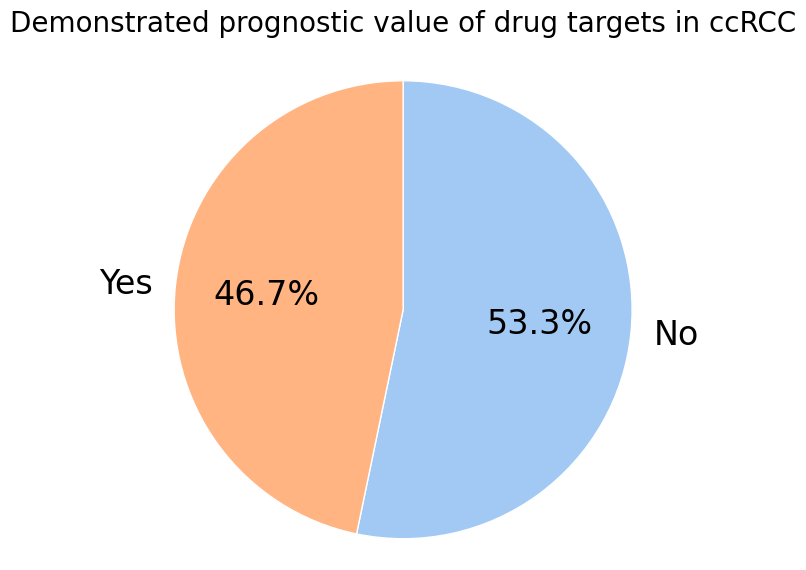

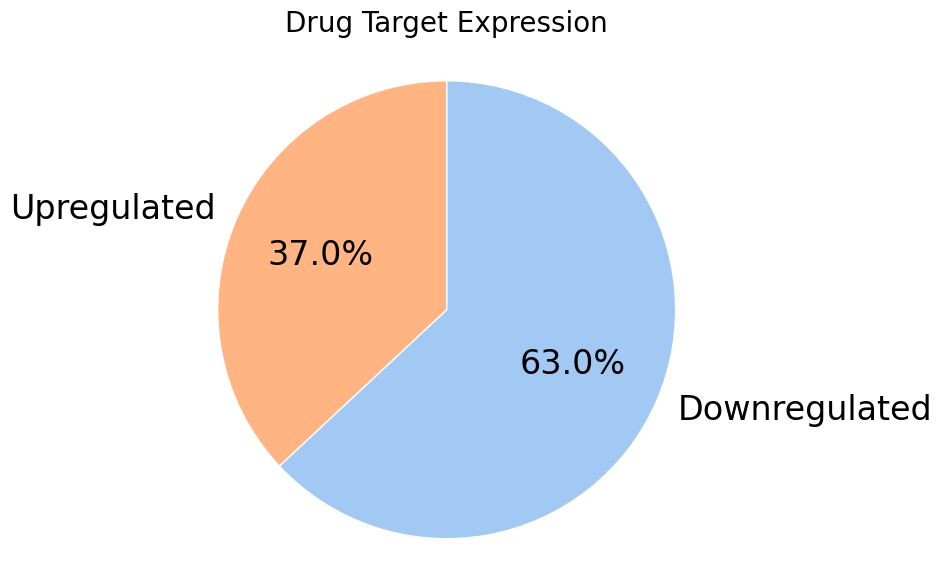

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define file paths
input_file1 = "/home/sr933/rcc/data/Key nodes.xlsx"
input_file2 = "/home/sr933/rcc/4_network_analysis/data/log2_fold_change.csv"
output_dir = "/home/sr933/output"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Read the Excel files
df1 = pd.read_excel(input_file1)
df2 = pd.read_csv(input_file2)

# Merge dataframes on the first column (assumed to be the key)
merged_df = df1.merge(df2, on=df1.columns[0], how="left")

# Convert column 1 from df2 into categorical values
merged_df[df2.columns[1]] = merged_df[df2.columns[1]].apply(lambda x: "Upregulated" if x > 0 else "Downregulated")

# Define function to create pie charts
def create_pie_chart(data, column_name, title):
    counts = data[column_name].value_counts()
    labels = counts.index
    sizes = counts.values

    # Color palette based on biological logic if relevant
    
    colors = sns.color_palette("pastel", len(labels))

    # Plot
    fig, ax = plt.subplots(figsize=(6.5, 6.5))
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        textprops={'fontsize': 24, 'color': 'black'},
        wedgeprops={'edgecolor': 'white'}
    )

    # Aesthetics
    for text in texts:
        text.set_fontsize(24)
    for autotext in autotexts:
        autotext.set_fontsize(24)
    
    ax.set_title(title, fontsize=20, pad=20)
    ax.axis("equal")  # Keep it a circle

    # Save figure
    output_path = os.path.join(output_dir, f"{title.replace(' ', '_')}.png")
    plt.savefig(output_path, dpi=900, bbox_inches='tight')
    plt.show()


# Create pie charts for relevant columns
create_pie_chart(merged_df, df1.columns[1], "Drug target localisation")
create_pie_chart(merged_df, df1.columns[2], "Drug target function")
create_pie_chart(merged_df, df1.columns[3], "Demonstrated prognostic value of drug targets in ccRCC")
create_pie_chart(merged_df, df2.columns[1], "Drug Target Expression")

# Save the merged DataFrame (optional)
merged_df.to_excel("/home/sr933/rcc/data/Supplementary_Key_Nodes.xlsx", index=False)